# Analysis of sales data (Home appliances and electronics retail store)

import Necessary Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Merge the 12 months of sales data into a single CSV file
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv('all_data.csv', index=False)

Read in updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [42]:
all_data.shape

(185950, 12)

### Cleaning the data by removing the Nan values

Drop rows of NAN

In [4]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head(55)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


#### find 'or' and delete it 

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### convert columns to the correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Augment data with additional columns 

Task 2 : Add month column 

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column 

In [8]:
all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each']

In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question 1 : What was the best month for sales ? How much was earned that month?

In [10]:
max_sales= all_data.groupby('Month').sum()
max_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


[Text(0.5, 0, 'months')]

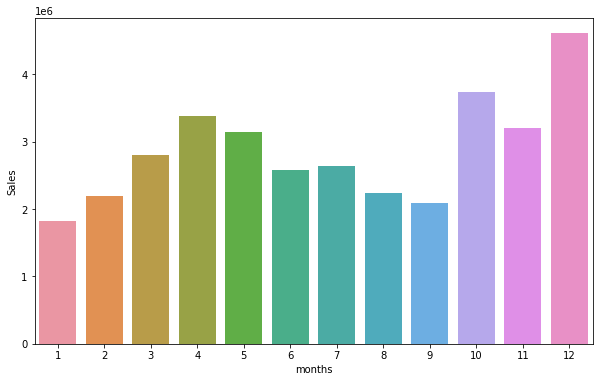

In [11]:
month  = list(range(1,13))
plt.figure(figsize=(10,6))
ax = sns.barplot(x=month,y='Sales', data=max_sales)
ax.set(xlabel= 'months')

### which city has the highest no. of sales 

In [12]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['state'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2][1:3])
all_data['City_state'] = all_data['city'] +" "+ "("+all_data['state']+")"
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,state,City_state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA)


#### which city has the highest no. of sales

In [13]:
max_sales_city = all_data.groupby('City_state').sum()
max_sales_city.head(12)

,Quantity Ordered,Price Each,Month,Sales
City_state,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


In [14]:
#plotting graph for max city sales
temp_city = [City_state for City_state, df in all_data.groupby('City_state')]
temp_city

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

Text(0, 0.5, 'Sales in USD ($)')

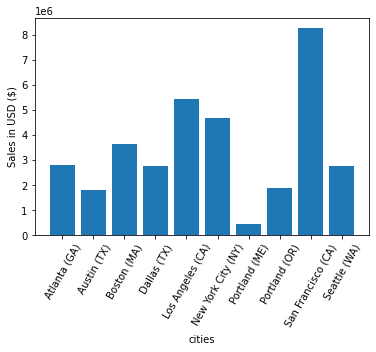

In [15]:
plt.bar(x=temp_city,height=max_sales_city['Sales'])
#sns.boxplot(x=temp_city, y= max_sales_city['Sales'])
plt.xticks(rotation = 60)
plt.xlabel('cities')
plt.ylabel('Sales in USD ($)')

#### what time should we display advertisements to maximize likelihood od customer's buying product? 

In [16]:
all_data['order_hour'] = all_data['Order Date'].apply(lambda x: x.split(' ')[1][0:2])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,state,City_state,order_hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX),08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA),22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA),09


In [17]:
max_sale_hour = all_data.groupby('order_hour').sum()
max_sale_hour.head()

,Quantity Ordered,Price Each,Month,Sales
order_hour,,,,
00,4428,709296.70,27554,713721.27
01,2619,458490.00,16657,460866.88
02,1398,233833.64,8507,234851.44
03,928,144726.42,5904,145757.89
04,937,162058.18,6148,162661.01


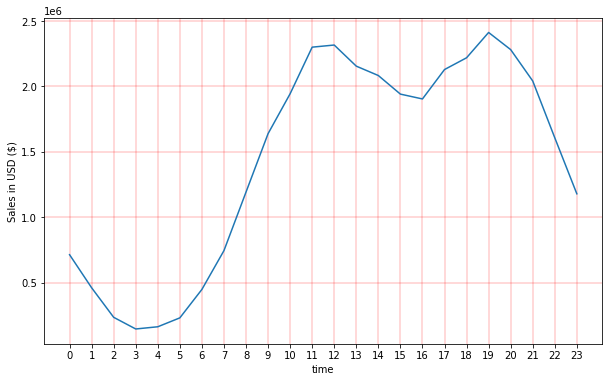

In [18]:
hours = list(range(0,24))
plt.figure(figsize=(10,6))
sns.lineplot(x= hours,y =max_sale_hour['Sales'])
plt.xticks(hours)
plt.xlabel('time')
plt.ylabel('Sales in USD ($)')
plt.grid(color='r', linestyle='-', linewidth=0.3, axis='both')

#### what products are more often sold ?

In [19]:
item_sold_together = all_data.groupby('Product').sum()
#item_sold_together['Quantity Ordered'].sort_values(ascending=False)
#products = all_data['Product'].duplicated(keep='first')
item_sold_together.head()
#products

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40


In [20]:
quantity_ordered = item_sold_together['Quantity Ordered']
products = [product for product, df in item_sold_together.groupby('Product')]

Text(0, 0.5, 'quantity ordered')

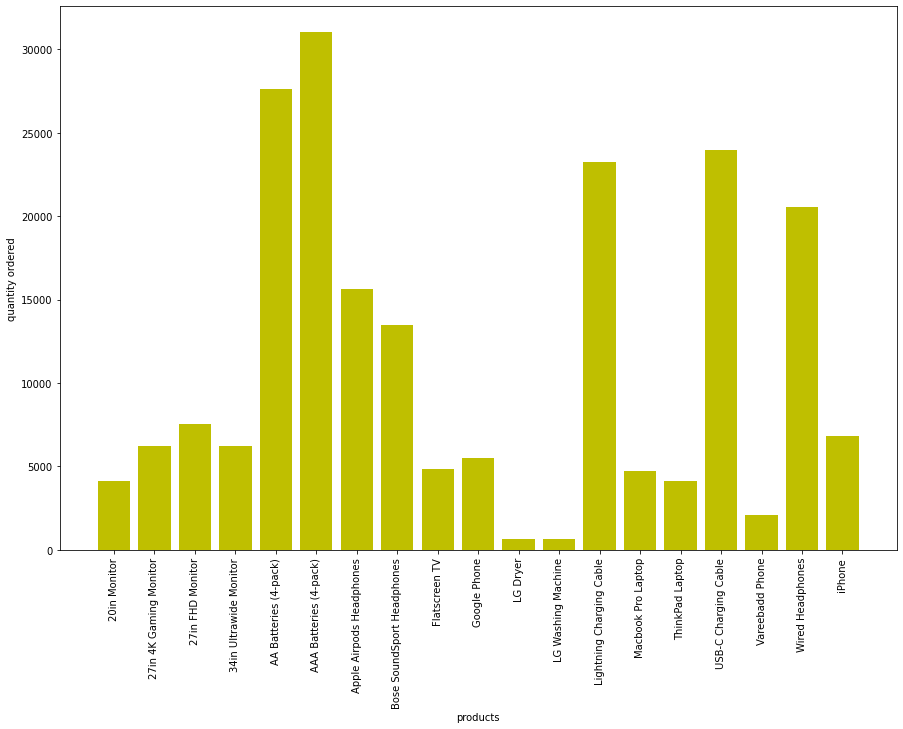

In [21]:
#sns.barplot(x=products,y=quantity_ordered)
plt.figure(figsize=(15,10))
plt.bar(products,quantity_ordered,color='y')
plt.xticks(rotation = 90)
plt.xlabel('products')
plt.ylabel('quantity ordered')

### creating product, price and quantity ordered in a single graph

C:\Users\kloke\AppData\Local\Temp/ipykernel_11756/3634050642.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


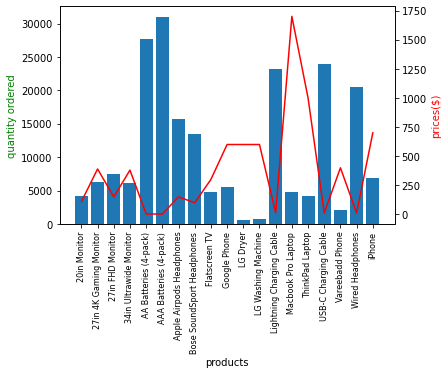

In [41]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax1.bar(products,quantity_ordered)
ax2 = ax1.twinx()
ax2.plot(products, prices, 'r-')

plt.xticks(rotation = 90)
ax1.set_xlabel('products')
ax1.set_ylabel('quantity ordered', color='g')
ax2.set_ylabel('prices($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

### Which items are sold together most ?


In [33]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\kloke\AppData\Local\Temp/ipykernel_11756/3593477360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [34]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
